In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names=headernames) 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

k_range= range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))

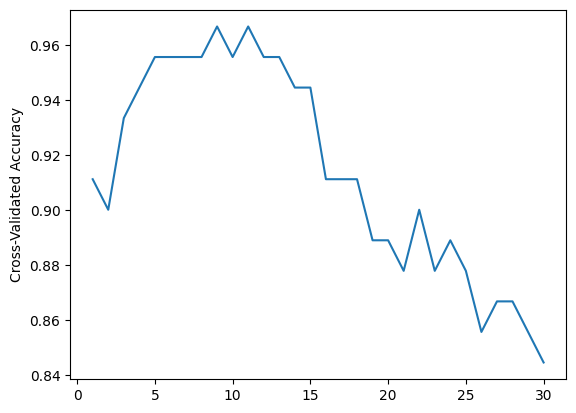

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.plot(k_range, scores)
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [121]:
optimal_k = np.argmax(scores) + 1 
print("Optimal value of k:", optimal_k) 

classifier = KNeighborsClassifier(n_neighbors=optimal_k) 
classifier.fit(X_train, y_train)

Optimal value of k: 9


KNeighborsClassifier(n_neighbors=9)

In [122]:
y_pred = classifier.predict(X_test)

result = confusion_matrix(y_test, y_pred) 
print(result)
print("Confusion Matrix:")

[[26  0  0]
 [ 0 14  1]
 [ 0  1 18]]
Confusion Matrix:


In [123]:
result1 = classification_report(y_test, y_pred) 
print("Classification Report: ") 
print(result1)

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        26
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.97        60
      macro avg       0.96      0.96      0.96        60
   weighted avg       0.97      0.97      0.97        60



In [124]:
result2 = accuracy_score (y_test, y_pred)
print("Accuracy: ", result2)

Accuracy:  0.9666666666666667
